## Support Vector Machines

- Used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

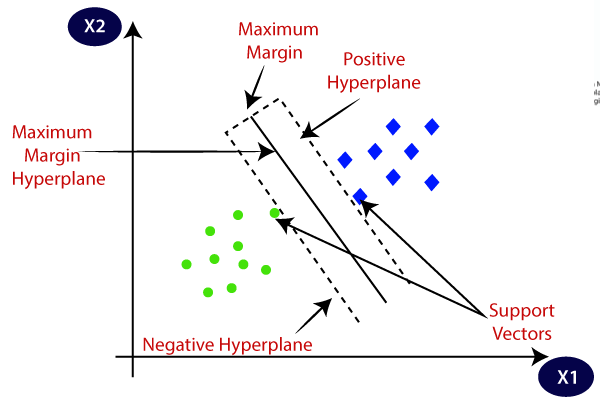

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np


ImportError: cannot import name 'neg_log_loss' from 'sklearn.metrics' (C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [2]:
from sklearn.svm import SVC

In [3]:
import os
os.chdir(r'C:\Users\dbda-lab\Desktop\pml\11 Practical Machine Learning\Datasets')
import pandas as pd

In [4]:
bank=pd.read_csv("Bankruptcy.csv")
bank.head()

NO  D  YR    R1    R2    R3    R4    R5    R6    R7  ...   R15   R16   R17  \
0   1  0  78  0.23  0.08  0.02  0.03  0.46  0.12  0.19  ...  0.05  0.57  0.15   
1   2  0  77  0.19  0.07  0.09  0.12  0.02  0.02  0.03  ...  0.09  0.12  0.16   
2   3  0  72  0.07  0.02  0.03  0.05  0.06  0.10  0.14  ... -0.03  0.02  0.02   
3   4  0  80  0.07  0.03  0.04  0.04  0.04  0.06  0.06  ... -0.02  0.01  0.02   
4   5  0  81  0.09  0.02  0.03  0.04  0.06  0.08  0.11  ...  0.02  0.07  0.10   

    R18    R19   R20   R21   R22   R23   R24  
0  0.23   3.56  0.26  1.55  0.43  0.11  0.17  
1  0.22   3.78  1.29  1.40  0.06  0.07  0.10  
2  0.04  13.29  1.61  1.43  0.03  0.05  0.07  
3  0.02   5.36  1.30  1.12 -0.06 -0.08 -0.09  
4  0.14   7.74  1.48  1.41  0.03  0.04  0.06  

[5 rows x 27 columns]

In [5]:
x=bank.drop(['NO','D','YR'],axis=1)
y=bank['D']

In [6]:
svm = SVC(kernel='linear',C =2 )  # for support vector machine

kfold = StratifiedKFold(n_splits= 5 ,random_state=2023,shuffle=True)
results = cross_val_score(svm, x,y,cv =kfold ,scoring= 'roc_auc')
print(results.mean())


params = {'C':[0.1,0.5,1,2,3,5]}

gcv = GridSearchCV(svm, param_grid =params,scoring='roc_auc',cv= kfold)
gcv.fit(x,y)

print(gcv.best_params_)
print(gcv.best_score_)



0.8840236686390532
{'C': 0.5}
0.8840236686390532


In [7]:
np.linspace(0.1,10,20)  # instead of passing hardcore values we are genrating the values

array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ])

In [8]:
svm = SVC(kernel='linear')  # for support vector machine

kfold = StratifiedKFold(n_splits= 5 ,random_state=2023,shuffle=True)
results = cross_val_score(svm, x,y,cv =kfold ,scoring= 'roc_auc')
print(results.mean())


params = {'C':np.linspace(0.1,10,20)}

gcv = GridSearchCV(svm, param_grid =params,scoring='roc_auc',cv= kfold)
gcv.fit(x,y)

print(gcv.best_params_)
print(gcv.best_score_)


0.8757396449704142
{'C': 0.6210526315789474}
0.8840236686390532


In [9]:
params = {'SVM__C':np.linspace(0.1, 10, 20)}
svm= SVC(kernel = 'linear')
scaler=StandardScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('STD',scaler),('SVM',svm)])
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='roc_auc')
gcv.fit(x,y)
gcv.best_params_, gcv.best_score_
#

({'SVM__C': 2.18421052631579}, 0.8775147928994083)

In [10]:
params = {'C':np.linspace(0.1, 10, 20)}
svm= SVC(kernel = 'linear')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
gcv = GridSearchCV(svm, param_grid=params, cv =kfold, scoring='roc_auc')
gcv.fit(x,y)
gcv.best_params_, gcv.best_score_

({'C': 0.6210526315789474}, 0.8840236686390532)

## Polynomial

In [11]:
scaler=MinMaxScaler()
SVM=SVC(kernel='poly')

In [12]:
params = {'SVM__C':np.linspace(0.1, 10, 20), 'SVM__degree':[2,3,4], 'SVM__coef0':np.linspace(0,10, 20)}
svm= SVC(kernel = 'poly')
scaler=MinMaxScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('STD',scaler),('SVM',svm)])
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='roc_auc')
gcv.fit(x,y)
gcv.best_params_, gcv.best_score_

({'SVM__C': 0.1, 'SVM__coef0': 1.5789473684210527, 'SVM__degree': 2},
 0.8917159763313609)

## Radial

In [13]:
scaler=MinMaxScaler()
SVM=SVC(kernel='rbf')    # for radail


In [14]:
params = {'SVM__C':np.linspace(0.1, 10, 20), 'SVM__gamma':np.linspace(0,10,20)}
svm= SVC(kernel = 'rbf')
scaler=MinMaxScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('SCL',scaler),('SVM',svm)])
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='roc_auc')
gcv.fit(x,y)
gcv.best_params_, gcv.best_score_

({'SVM__C': 0.1, 'SVM__gamma': 1.5789473684210527}, 0.8693153000845311)

In [15]:
import sklearn
sklearn.__version__

'1.2.0'

## Kyphosis

In [16]:
kyp = pd.read_csv("Kyphosis.csv")
kyp

Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]

In [17]:
x=kyp.drop('Kyphosis',axis=1)
y = kyp['Kyphosis']
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [18]:
dum_y=pd.get_dummies(y, drop_first=True)
dum_y

present
0         0
1         0
2         1
3         0
4         0
..      ...
76        1
77        0
78        0
79        1
80        0

[81 rows x 1 columns]

In [19]:
pd.Series(dum_y['present'])

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: present, Length: 81, dtype: uint8

In [20]:
# radial
params = {'SVM__C':np.linspace(0.1, 10, 20), 'SVM__gamma':np.linspace(0,10,20)}
svm= SVC(kernel = 'rbf')
scaler=MinMaxScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('SCL',scaler),('SVM',svm)])
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='roc_auc')
gcv.fit(x,y)
gcv.best_params_, gcv.best_score_

({'SVM__C': 6.352631578947369, 'SVM__gamma': 0.5263157894736842},
 0.8772435897435896)

In [21]:
# linear
params = {'SVM__C':np.linspace(0.1, 10, 20)}
svm= SVC(kernel = 'linear')
scaler=StandardScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('STD',scaler),('SVM',svm)])
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='roc_auc')
gcv.fit(x,y)
gcv.best_params_, gcv.best_score_

({'SVM__C': 0.6210526315789474}, 0.8182692307692309)

In [22]:
# polynomial
params = {'SVM__C':np.linspace(0.1, 10, 20), 'SVM__degree':[2,3,4], 'SVM__coef0':np.linspace(0,10, 20)}
svm= SVC(kernel = 'poly')
scaler=MinMaxScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('STD',scaler),('SVM',svm)])
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='roc_auc')
gcv.fit(x,y)
gcv.best_params_, gcv.best_score_

({'SVM__C': 0.6210526315789474,
  'SVM__coef0': 4.2105263157894735,
  'SVM__degree': 2},
 0.871474358974359)

## MULTICLASS : OVO/OVR

In [23]:
pix = pd.read_csv("Image_Segmention.csv")
pix.head()

Class  region.centroid.col  region.centroid.row  region.pixel.count  \
0  BRICKFACE                  188                  133                   9   
1  BRICKFACE                  105                  139                   9   
2  BRICKFACE                   34                  137                   9   
3  BRICKFACE                   39                  111                   9   
4  BRICKFACE                   16                  128                   9   

   short.line.density.5  short.line.density.2  vedge.mean  vegde.sd  \
0                   0.0                   0.0    0.333333  0.266667   
1                   0.0                   0.0    0.277778  0.107407   
2                   0.0                   0.0    0.500000  0.166667   
3                   0.0                   0.0    0.722222  0.374074   
4                   0.0                   0.0    0.500000  0.077778   

   hedge.mean  hedge.sd  intensity.mean  rawred.mean  rawblue.mean  \
0    0.500000  0.077778        6.666666     8.333334      7.777778   
1    0.833333  0.522222        6.111111     7.555555      7.222222   
2    1.111111  0.474074        5.851852     7.777778      6.444445   
3    0.888889  0.429629        6.037037     7.000000      7.666666   
4    0.666667  0.311111        5.555555     6.888889      6.666666   

   rawgreen.mean  exred.mean  exblue.mean  exgreen.mean  value.mean  \
0       3.888889    5.000000     3.333333     -8.333333    8.444445   
1       3.555556    4.333334     3.333333     -7.666666    7.555555   
2       3.333333    5.777778     1.777778     -7.555555    7.777778   
3       3.444444    2.888889     4.888889     -7.777778    7.888889   
4       3.111111    4.000000     3.333333     -7.333334    7.111111   

   saturation.mean  hue-mean  
0         0.538580 -0.924817  
1         0.532628 -0.965946  
2         0.573633 -0.744272  
3         0.562919 -1.175773  
4         0.561508 -0.985811

In [25]:
X = pix.drop('Class', axis=1)
y = pix['Class']
X

region.centroid.col  region.centroid.row  region.pixel.count  \
0                    188                  133                   9   
1                    105                  139                   9   
2                     34                  137                   9   
3                     39                  111                   9   
4                     16                  128                   9   
..                   ...                  ...                 ...   
204                   36                  243                   9   
205                  186                  218                   9   
206                  197                  236                   9   
207                  208                  240                   9   
208                  223                  185                   9   

     short.line.density.5  short.line.density.2  vedge.mean  vegde.sd  \
0                0.000000                   0.0    0.333333  0.266667   
1                0.000000                   0.0    0.277778  0.107407   
2                0.000000                   0.0    0.500000  0.166667   
3                0.000000                   0.0    0.722222  0.374074   
4                0.000000                   0.0    0.500000  0.077778   
..                    ...                   ...         ...       ...   
204              0.111111                   0.0    1.888889  1.851851   
205              0.000000                   0.0    1.166667  0.744444   
206              0.000000                   0.0    2.444444  6.829628   
207              0.111111                   0.0    1.055556  0.862963   
208              0.000000                   0.0    0.500000  0.349603   

     hedge.mean  hedge.sd  intensity.mean  rawred.mean  rawblue.mean  \
0      0.500000  0.077778        6.666666     8.333334      7.777778   
1      0.833333  0.522222        6.111111     7.555555      7.222222   
2      1.111111  0.474074        5.851852     7.777778      6.444445   
3      0.888889  0.429629        6.037037     7.000000      7.666666   
4      0.666667  0.311111        5.555555     6.888889      6.666666   
..          ...       ...             ...          ...           ...   
204    2.000000  0.711110       13.333333     9.888889     12.111111   
205    1.166667  0.655555       13.703704    10.666667     12.666667   
206    3.333333  7.599998       16.074074    13.111111     16.666668   
207    2.444444  5.007407       14.148149    10.888889     13.000000   
208    2.388889  2.080776       12.962963    11.555555      9.777778   

     rawgreen.mean  exred.mean  exblue.mean  exgreen.mean  value.mean  \
0         3.888889    5.000000     3.333333     -8.333333    8.444445   
1         3.555556    4.333334     3.333333     -7.666666    7.555555   
2         3.333333    5.777778     1.777778     -7.555555    7.777778   
3         3.444444    2.888889     4.888889     -7.777778    7.888889   
4         3.111111    4.000000     3.333333     -7.333334    7.111111   
..             ...         ...          ...           ...         ...   
204      18.000000  -10.333333    -3.666667     14.000000   18.000000   
205      17.777779   -9.111111    -3.111111     12.222222   17.777779   
206      18.444445   -8.888889     1.777778      7.111111   18.555555   
207      18.555555   -9.777778    -3.444444     13.222222   18.555555   
208      17.555555   -4.222222    -9.555555     13.777778   17.555555   

     saturation.mean  hue-mean  
0           0.538580 -0.924817  
1           0.532628 -0.965946  
2           0.573633 -0.744272  
3           0.562919 -1.175773  
4           0.561508 -0.985811  
..               ...       ...  
204         0.452229  2.368311  
205         0.401347  2.382684  
206         0.292729  2.789800  
207         0.421621  2.392487  
208         0.445418  1.838850  

[209 rows x 19 columns]

In [26]:
label=LabelEncoder()
le_y=label.fit_transform(y)
le_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [43]:
scaler=MinMaxScaler()
svm= SVC(kernel = 'linear',probability=True,random_state=2023)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('Scl',scaler),('SVM',svm)])
params = {'SVM__C':np.linspace(0.1, 10, 20), 'SVM__decision_function_shape':['ovo','ovr']}
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='neg_log_loss')
gcv.fit(X,le_y)
print("\nLINEAR :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR :>>>>")
print('best parameter :', gcv.best_params_)
gcv.best_params_, gcv.best_score_


LINEAR :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR :>>>>
best parameter : {'SVM__C': 3.2263157894736847, 'SVM__decision_function_shape': 'ovo'}


({'SVM__C': 3.2263157894736847, 'SVM__decision_function_shape': 'ovo'},
 -0.4129170343469249)

In [33]:
# linear
scaler=MinMaxScaler()
svm= SVC(kernel = 'rbf',probability=True,random_state=2023)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('Scl',scaler),('SVM',svm)])
params = {'SVM__C':np.linspace(0.1, 10, 20), 'SVM__decision_function_shape':['ovo','ovr']}
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='neg_log_loss')
gcv.fit(X,le_y)
print("\nLINEAR :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR :>>>>")
print('best parameter :', gcv.best_params_)
gcv.best_params_, gcv.best_score_


LINEAR :: USING SCALER AND PIPE :>>>>
best parameter : {'SVM__C': 3.2263157894736847, 'SVM__decision_function_shape': 'ovo'}
roc auc score : -0.4129170343469249


In [41]:
# for radial
params = {'SVM__C':np.linspace(0.1, 10, 20), 'SVM__gamma':np.linspace(0,10,20),'SVM__decision_function_shape':['ovo','ovr']}
svm= SVC(kernel = 'rbf')
scaler=MinMaxScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('SCL',scaler),('SVM',svm)])
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='neg_log_loss')
gcv.fit(X,le_y)
print("\nLINEAR :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR :>>>>")
print('best parameter :', gcv.best_params_)
gcv.best_params_, gcv.best_score_

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U


LINEAR :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR :>>>>
best parameter : {'SVM__C': 0.1, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 0.0}


C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 302, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 72, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "C:\U

({'SVM__C': 0.1, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 0.0},
 nan)

In [45]:
# linear
# In svm we taken probabiltiy and random state .when we took prob is true then we compulsory need 
# to pass random state
scaler=MinMaxScaler()
svm= SVC(kernel = 'Poly',probability=True,random_state=2023)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('Scl',scaler),('SVM',svm)])
params = {'SVM__C':np.linspace(0.1, 10, 20),'SVM__degree':[2,3,4] ,'SVM__coef0':np.linspace(0,10, 20), 'SVM__decision_function_shape':['ovo','ovr']}
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='neg_log_loss')
gcv.fit(X,le_y)
print("\nPoly :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR :>>>>")
print('best parameter :', gcv.best_params_)
gcv.best_params_, gcv.best_score_

ValueError: 
All the 12000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'kernel' parameter of SVC must be a str among {'precomputed', 'rbf', 'poly', 'linear', 'sigmoid'} or a callable. Got 'Poly' instead.


In [46]:
params = {'SVM__C':np.linspace(0.1, 10, 20), 'SVM__degree':[2,3,4], 'SVM__coef0':np.linspace(0,10, 20),SVM__decision_function_shape':['ovo','ovr']}
svm= SVC(kernel = 'Poly',probability=True,random_state=2023)
scaler=MinMaxScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
pipe=Pipeline([('STD',scaler),('SVM',svm)])
gcv = GridSearchCV(pipe, param_grid=params, cv =kfold, scoring='neg_log_loss')
gcv.fit(X,le_y)
print("\nPoly :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR :>>>>")
print('best parameter :', gcv.best_params_)
gcv.best_params_, gcv.best_score_

SyntaxError: invalid syntax (267988187.py, line 1)

In [49]:
#Poly :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR
svm  = SVC(kernel = 'poly', random_state=2023, probability = True)
pipe = Pipeline([('STD',scaler),('SVM',svm )])
params = {'SVM__C': np.linspace(0.1,10,20), 'SVM__decision_function_shape':['ovo','ovr'],'SVM__degree':[2,3,4],'SVM__coef0':np.linspace(0,10,20)}
kfold = StratifiedKFold(n_splits= 5, shuffle= True, random_state=2023)
gcv = GridSearchCV(pipe, param_grid= params , cv = kfold, scoring= 'neg_log_loss')
gcv.fit(X,le_y)
print("\nPoly :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR :>>>>")
print(gcv.best_params_)
print(gcv.best_score_)


Poly :: USING SCALER AND PIPE FOR MULTICLASS SO WE ARE USING OVO AND OVR :>>>>
{'SVM__C': 1.142105263157895, 'SVM__coef0': 2.631578947368421, 'SVM__decision_function_shape': 'ovo', 'SVM__degree': 3}
-0.3932141734047174


In [48]:
veh=pd.read_csv('Vehicle.csv')
veh

Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
0      95    48      83     178          72        10      162     42   
1      91    41      84     141          57         9      149     45   
2     104    50     106     209          66        10      207     32   
3      93    41      82     159          63         9      144     46   
4      85    44      70     205         103        52      149     45   
..    ...   ...     ...     ...         ...       ...      ...    ...   
841    93    39      87     183          64         8      169     40   
842    89    46      84     163          66        11      159     43   
843   106    54     101     222          67        12      222     30   
844    86    36      78     146          58         7      135     50   
845    85    36      66     123          55         5      120     56   

     Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis  Ra.Gyr  Skew.Maxis  \
0              20         159           176           379     184          70   
1              19         143           170           330     158          72   
2              23         158           223           635     220          73   
3              19         143           160           309     127          63   
4              19         144           241           325     188         127   
..            ...         ...           ...           ...     ...         ...   
841            20         134           200           422     149          72   
842            20         159           173           368     176          72   
843            25         173           228           721     200          70   
844            18         124           155           270     148          66   
845            17         128           140           212     131          73   

     Skew.maxis  Kurt.maxis  Kurt.Maxis  Holl.Ra Class  
0             6          16         187      197   van  
1             9          14         189      199   van  
2            14           9         188      196  saab  
3             6          10         199      207   van  
4             9          11         180      183   bus  
..          ...         ...         ...      ...   ...  
841           7          25         188      195  saab  
842           1          20         186      197   van  
843           3           4         187      201  saab  
844           0          25         190      195  saab  
845           1          18         186      190   van  

[846 rows x 19 columns]